In [13]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [66]:
df

,timestamp,avg_price,dividend_yield,earnings_yield,enterprise_value,crude_oil_price,sentiment
0,2013-09-19,42.318316,0.051000,0.190400,1.518100e+11,106.260000,1.000000
1,2013-09-20,42.598544,0.050900,0.189800,1.527000e+11,104.700000,1.000000
2,2013-09-21,42.496745,0.050967,0.190100,1.524900e+11,104.340000,1.000000
3,2013-09-22,42.394947,0.051033,0.190400,1.522800e+11,103.980000,1.000000
4,2013-09-23,42.293148,0.051100,0.190700,1.520700e+11,103.620000,1.000000
...,...,...,...,...,...,...,...
2861,2021-07-20,23.019519,0.054500,0.110700,1.261600e+11,67.244000,1.000000
2862,2021-07-21,23.930742,0.052700,0.107000,1.288600e+11,70.300000,1.500000
2863,2021-07-22,23.651055,0.053300,0.108300,1.279100e+11,71.910000,1.000000
2864,2021-07-23,23.555018,0.053500,0.108700,1.276100e+11,72.070000,1.000000


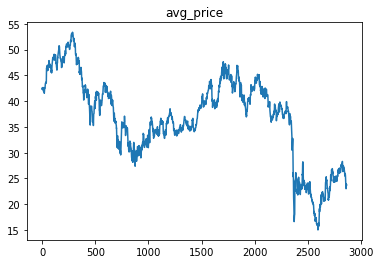

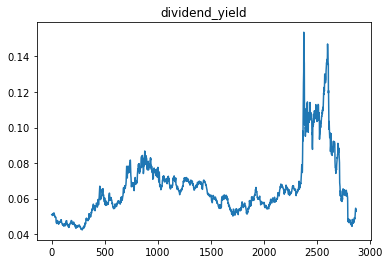

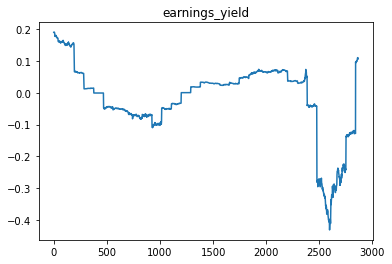

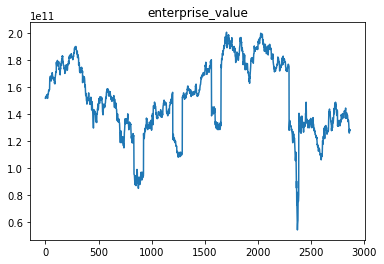

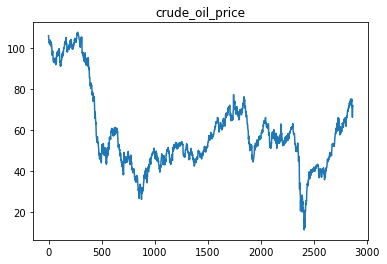

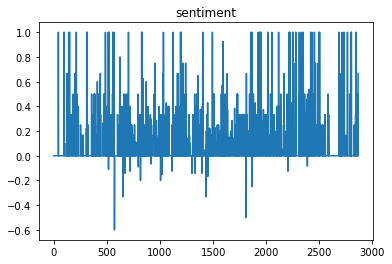

In [20]:
df = pd.read_csv("data\\6_extended_data\\BP_final_data_with_sentiment.csv", index_col=0)
df['sentiment'] = df['sentiment']-1
for col in df.columns[1:]:
    df[col].plot(title=col)
    plt.show()

# DATA PREPARATION

In [235]:
data_paths = ['data\\6_extended_data\\BP_final_data_with_sentiment.csv', 'data\\6_extended_data\\VLKAF_final_data_with_sentiment.csv']
input_window_size = 14
output_window_size = 3
shift = 3

In [236]:
company_name_list = []
input_period_start_date_list = []
input_period_end_date_list = []
output_period_start_date_list = []
output_period_end_date_list = []
x_min_list = []
x_scale_list = []
X = []
Y = []
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
for path in data_paths:
    print(path)
    company_name = path.split('data\\6_extended_data\\')[1].replace("_final_data_with_sentiment.csv", "")
    df = pd.read_csv(path, index_col=0).reset_index(drop=True)
    df.timestamp = pd.to_datetime(df.timestamp)
    df.sort_values(by='timestamp', inplace=True)
    for i in range(0, df.shape[0] - input_window_size - output_window_size, shift):

        input_period_df = df.loc[i:i + input_window_size - 1, :].reset_index(drop=True)
        #print(input_period_df)
        cols = df.columns[1:]
        #Date column is not used in training.
        #print("columns", cols)
        input_period = scaler.fit_transform(input_period_df[cols])
        
        #print(df_for_training_scaled)
        #input_period = input_period_df.avg_price
        input_period_start_date = input_period_df.timestamp.min()
        input_period_end_date = input_period_df.timestamp.max()

        output_period_df = df.loc[
                           i + input_window_size: i + input_window_size + output_window_size - 1,
                           :].reset_index(drop=True)
        #output_period = output_period_df.avg_price
        output_period = scaler.transform(output_period_df[cols])
        #print(df_for_training_scaled)
        output_period_start_date = output_period_df.timestamp.min()
        output_period_end_date = output_period_df.timestamp.max()

        input_period_min = input_period.min()
        input_period_max = input_period.max()
        #         input_period = (input_period - input_period_min) / (input_period_max - input_period_min)
        #         output_period = (output_period - input_period_min) / (input_period_max - input_period_min)

        # we are testing different periods
        # if len(input_period) != 90:
        #    print("zle", company_name, i, df.shape[0])
        # if len(output_period) != 30:
        #    print("zle", company_name, i, df.shape[0])

        company_name_list.append(company_name)
        input_period_start_date_list.append(input_period_start_date)
        input_period_end_date_list.append(input_period_end_date)
        output_period_start_date_list.append(output_period_start_date)
        output_period_end_date_list.append(output_period_end_date)

        # Check
        input_period_days_span = (input_period_end_date - input_period_start_date).days
        output_period_days_span = (output_period_end_date - output_period_start_date).days

        # assert input_period_days_span == self.input_window_size - 1, \
        #     f"Input size mismatch {input_period_days_span} != {self.input_window_size - 1}"
        # assert output_period_days_span == self.output_window_size - 1, \
        #     f"Output size mismatch {output_period_days_span} != {self.output_window_size - 1}"

        x_min_list.append(scaler.min_[0])
        x_scale_list.append(scaler.scale_[0])

        # if output_averaging:
        #     output_period = _series_averaging(output_period)
        #     print(output_period)
        #     break
        # if input_averaging:
        #     input_period = _series_averaging(input_period)
        # #         print("input_period", input_period)
        # #         print(X_df)
        X.append(input_period)
        #print(X_df)
        Y.append(output_period[:,0])
X = np.array(X)
Y = np.array(Y)
assert np.isnan(X).sum() == 0, 'Nans in X array'
assert np.isnan(Y).sum() == 0, 'Nans in Y array'

data\6_extended_data\BP_final_data_with_sentiment.csv
data\6_extended_data\VLKAF_final_data_with_sentiment.csv


In [237]:
X.shape, Y.shape

((1755, 14, 6), (1755, 3))

In [238]:
normalization_arrays = (x_min_list, x_max_list, company_name_list, input_period_start_date_list, input_period_end_date_list, \
        output_period_start_date_list, output_period_end_date_list)

# SPLIT

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [240]:
X_train.shape, X_test.shape

((1175, 14, 6), (580, 14, 6))

# LSTM modelling

In [241]:
experiment_name = 'Experiment 1 - predict 30 days'
experiment_id = 1
input_averaging = False
output_averaging = False
optimizer = Adam()
optimizer_name = 'Adam'
activation_function = 'sigmoid'
use_log = False
architecture_name = '2xLSTM'
epochs=5
n_features=X.shape[-1]


In [242]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping
from datetime import datetime

class Model:
    def __init__(self, experiment_name):
        self.experiment_name = experiment_name

class NeuralNetworkModel(Model):
    def __init__(self, experiment_name, experiment_id, input_window_size, output_window_size, optimizer_name,
                 activation="tanh", freq=30, input_averaging=False,
                 output_averaging=False, n_features=1, optimizer=Adam(), loss=MeanSquaredError(), use_log=True):
        super().__init__(experiment_name)
        self.model = Sequential()
        self.experiment_name = experiment_name
        self.experiment_id = experiment_id
        self.input_window_size = input_window_size
        self.output_window_size = output_window_size
        self.input_averaging = input_averaging
        self.output_averaging = output_averaging
        self.freq = freq
        self.use_log = use_log
        self.optimizer = optimizer
        self.loss = loss
        self.batch_size = None
        self.n_features = n_features
        self.n_steps = input_window_size if not input_averaging else math.ceil(input_window_size / freq)
        self.output_size = output_window_size if not output_averaging else math.ceil(output_window_size / freq)
        self.architecture_name = None
        self.model_details = None
        self.optimizer_name = optimizer_name
        self.activation = activation
        self.results = None
        self.epochs = None

    def generate_saving_name(self):
        return f"{self.experiment_name}_input_window_size_{self.input_window_size}_output_window_size_{self.output_window_size}_freq_{self.freq}_n_steps_{self.n_steps}_output_size_{self.output_size}_use_log_{self.use_log}_architecture_{self.architecture_name}_optimizer_{self.optimizer_name}"

    def prepare(self, layers_list, architecture_name, optimizer=Adam(), optimizer_name='Adam', activation="tanh"):
        self.architecture_name = architecture_name
        self.optimizer = optimizer
        self.optimizer_name = optimizer_name
        self.activation = activation
        # prepare model
        self.model = Sequential()
        for idx, layer in enumerate(layers_list):
            if idx == 0:
                layer._batch_input_shape = (None, self.n_steps, self.n_features)
            # if idx == len(layers_list)-1:
            #     layer.units = self.output_size
            self.model.add(layer)
        self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=['mape', 'mse'])

    def fit(self, X_train, Y_train, batch_size=128, validation_split=0.2, epochs=10):
        # epochs zmień jak będziesz trenował
        #epochs = 3
        self.batch_size = batch_size
        print("X_train.shape: ", X_train.shape)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], self.n_features)) # TODO: self.n_features zamiast 1
        print("X_train.shape after reshape: ", X_train.shape)
        callback = EarlyStopping(monitor='loss', patience=25, restore_best_weights=True, min_delta=0.001)
        self.results = self.model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=[callback]) # validation_split=validation_split,
        # self.model_details = [(l.name, l._build_input_shape.dims[1].value) for l in self.model.layers]
        #print(self.model.summary())
#         with open(
#                 f'{LSTM_MODEL_RESULTS}/{self.experiment_name}_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_modelsummary.txt',
#                 # _architecture_{self.architecture_name}
#                 'w') as f:
#             self.model.summary(print_fn=lambda x: f.write(x + '\n'))

    def test(self, X_test, Y_test, normalization_arrays):
        print("X_test_shape_before_reshape", X_test.shape)
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], self.n_features))
        print("X_test_shape_after_reshape", X_test.shape)
        # mse_test_score = self.model.evaluate(X_test, Y_test, batch_size=self.batch_size, verbose=0)
        Y_predict = self.model.predict(X_test)
        #print("x_test before denormalisation: ", X_test)
        #print("y_test before denormalisation: ", Y_test)
        #print("y_predict before denormalisation: ", Y_predict)
        # denormalize values
        _, x_min_test, _, x_max_test, _, company_name_test, _, input_period_start_date_test, _, input_period_end_date_test, _, output_period_start_date_test, _, output_period_end_date_test = normalization_arrays
        #_, x_min_test, _, x_max_test, _, _, _, _, _, _, _, _, _, _ = normalization_arrays
        x_min_test = np.array(x_min_test)
        x_max_test = np.array(x_max_test)
        print("x_min_test", x_min_test)
        print("x_max_test", x_max_test)
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
        print("X_test_shape_after_returning from reshape", X_test.shape)
        X_test = denormalize_x(array=X_test, x_min=x_min_test, x_max=x_max_test)
        Y_test = denormalize_y(array=Y_test, x_min=x_min_test, x_max=x_max_test)
        Y_predict = denormalize_y(array=Y_predict, x_min=x_min_test, x_max=x_max_test)
        # # calculate errors
        # Y_test = np.array(Y_test)
        # Y_predict = np.array(Y_predict)
        # print("y_test after denormalisation: ", Y_test)
        # print("y_predict after denormalisation: ", Y_predict)
        if self.use_log:
            print("reversing log operation (using exponent)")
            X_test = np.exp(X_test)
            Y_test = np.exp(Y_test)
            Y_predict = np.exp(Y_predict)
        # show predictions plot
#         self.save_predictions(X_test, Y_test, Y_predict, company_name_test, input_period_start_date_test,
#                               input_period_end_date_test, output_period_start_date_test, output_period_end_date_test)
        # save_results
#         self.save_results(X_test, Y_test, Y_predict, company_name_test, input_period_start_date_test, input_period_end_date_test, output_period_start_date_test, output_period_end_date_test)
        # calculate errors
        mse_test_score = ((Y_test - Y_predict) ** 2).mean()
        mape_test_score = (abs((Y_test - Y_predict) / Y_test)).mean() * 100
        return mse_test_score, mape_test_score

    def run(self, X_train, Y_train, X_test, Y_test, normalization_arrays, epochs):
        # measure execution time
        start_time = datetime.now()
        self.epochs = epochs
        self.fit(X_train, Y_train, epochs=epochs)
        end_time = datetime.now()
        execution_time = end_time - start_time
        # history = self.results.history
        # calculate train errors
        mse_train_score = self.results.history['mse'][-1]
        mape_train_score = self.results.history['mape'][-1]
        mse_val_score = self.results.history['val_mse'][-1]
        mape_val_score = self.results.history['val_mape'][-1]
        # test errors
        mse_test_score, mape_test_score = self.test(X_test, Y_test, normalization_arrays)
        print(f"MSE TEST SCORE: {mse_test_score}")
        print(f"MSE VALIDATION SCORE: {mse_val_score}")
        print(f"MSE TRAIN SCORE: {mse_train_score}")
        print(f"MAPE TEST SCORE: {mape_test_score}")
        print(f"MAPE VALIDATION SCORE: {mape_val_score}")
        print(f"MAPE TRAIN SCORE: {mape_train_score}")
        #plot train errors
        #self.plot_history()
        #Save experiment to MASTER TABLE
#         self.save_experiment(mse_test_score=mse_test_score, mape_test_score=mape_test_score,
#                              mse_train_score=mse_train_score, mape_train_score=mape_train_score,
#                              mse_val_score=mse_val_score, mape_val_score=mape_val_score, exec_time=execution_time)

    def plot_history(self):
        history = self.results.history
        fig = plt.figure(figsize=(16, 5))
        plt.plot(history['val_loss'])
        plt.plot(history['loss'])
        plt.legend(['val_loss', 'loss'])
        plt.title(f'Loss(mse) for {self.experiment_name}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        date_string = dt.datetime.now().strftime("%Y-%m-%d_%H-%M")
        # TODO: date and plot id !!!!
        plt.savefig(
            f"{LSTM_PLOTS_PATH}/{self.experiment_name}_nn_training_history_mse_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_{date_string}.png")  # _{self.architecture_name}
        #plt.show()
        plt.close(fig)
        ###
        fig2 = plt.figure(figsize=(16, 5))
        plt.plot(history['val_mape'])
        plt.plot(history['mape'])
        plt.legend(['val_mape', 'mape'])
        plt.title(f'MAPE for {self.experiment_name}')
        plt.xlabel('Epochs')
        plt.ylabel('MAPE')
        plt.savefig(
            f"{LSTM_PLOTS_PATH}/{self.experiment_name}_nn_training_history_mape_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_{date_string}.png")  # _{self.architecture_name}
        #plt.show()
        plt.close(fig2)

    def save_predictions(self, X_test, Y_test, Y_predict, company_name_test, input_period_start_date_test,
                         input_period_end_date_test, output_period_start_date_test, output_period_end_date_test):
        imageid = 0
        for i in range(len(Y_test)):  # len of X_test or Y_predict can be also used here
            imageid += 1
            company = company_name_test[i]

            input_start_date = input_period_start_date_test[i]
            input_end_date = input_period_end_date_test[i]
            output_start_date = output_period_start_date_test[i]
            output_end_date = output_period_end_date_test[i]

            # for clarity - change input_end_date in input_period_range to output_start_date
            if self.input_averaging:
                input_per_range = []
                input_per_range.append(pd.Timestamp(input_start_date)) #here first value is added
                for period in range(self.n_steps): #we start from 0 to n_steps-1, but we add +1 because of chart (the last date from input set + first from the output set)
                    input_per_range.append(pd.Timestamp(input_start_date) + DateOffset(days=30*(period+1)))
                input_period_range = pd.DatetimeIndex(input_per_range)
            else:
                input_period_range = pd.date_range(input_start_date, output_start_date)

            if self.output_averaging:
                output_per_range = []
                output_per_range.append(pd.Timestamp(output_start_date)) #here first value is added
                for period in range(self.output_size-1): # -1 because we have added already first value
                    output_per_range.append(pd.Timestamp(output_start_date) + DateOffset(days=30 * (period + 1)))
                output_period_range = pd.DatetimeIndex(output_per_range)
            else:
                output_period_range = pd.date_range(output_start_date, output_end_date)

            assert len(input_period_range) == (self.n_steps + 1), 'wrong input period len'
            assert len(output_period_range) == (self.output_size), 'wrong output period len'

            # temporary condition
            # if len(input_period_range) > self.input_window_size:
            #    input_period_range = input_period_range[:self.input_window_size]
            # if len(output_period_range) > self.output_window_size:
            #    output_period_range = output_period_range[:self.output_window_size]
            # x ranges
            # X_test_len = range(len(X_test[i]))
            # Y_test_len = range(X_test_len[-1], X_test_len[-1] + len(Y_test[i]))
            # Y_predict_len = range(X_test_len[-1], X_test_len[-1] + len(Y_predict[i]))
            fig = plt.figure(figsize=(14, 8))
            plt.title(f"{self.experiment_name} {company} company")
            plt.ylabel("Company price [\$]")
            plt.xlabel("Time periods")

            # for better plot - fill the hole + period tak samo
            tmp = np.append(X_test[i], Y_test[i][0])
            # input_period_range = ^up (u gory)

            plt.plot(input_period_range, tmp, "b-", label='training')  # "bo-" #X_test[i]
            plt.plot(output_period_range, Y_test[i], "g-", label='actual')  # "go-"
            plt.plot(output_period_range, Y_predict[i], "r-", label='forecast')  # "ro-"
            plt.legend()
            # plt.ylim(min,max) #zakres y od min do max
            date_string = dt.datetime.now().strftime("%Y-%m-%d_%H-%M")
            plt.savefig(
                f"{LSTM_PLOTS_PATH}/{self.experiment_name}_prediction_plot_id_{imageid}_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_{date_string}.png")  # _{self.architecture_name}
            # plt.show()
            plt.close(fig)
            # print just 5/10 plots
            # TODO: maybe change this condition
            if i > 20:
                break

    def save_results(self, X_test, Y_test, Y_predict, company_name_test, input_period_start_date_test, input_period_end_date_test,
                     output_period_start_date_test, output_period_end_date_test):
        # 1. Save experiment results
        df = pd.DataFrame()
        data_tuples = list(zip(X_test, Y_test, Y_predict, company_name_test, input_period_start_date_test, input_period_end_date_test,
                               output_period_start_date_test, output_period_end_date_test))
        df = df.append(data_tuples, ignore_index=True)
        df.columns = ['x_test', 'y_test', 'y_predict', 'company_name', 'x_start_date', 'x_end_date', 'y_start_date',
                      'y_end_date']
        # print(df)
        date_string = dt.datetime.now().strftime("%Y-%m-%d_%H-%M")
        df.to_csv(f"{LSTM_MODEL_RESULTS}/{self.experiment_name}_results_{date_string}.csv")
        # 2. Save loss and val_loss values
        df2 = pd.DataFrame()
        data_tuples2 = list(zip(self.results.history['mse'], self.results.history['val_mse'],
                                self.results.history['mape'], self.results.history['val_mape']))
        df2 = df2.append(data_tuples2, ignore_index=True)
        df2.columns = ['mse_train', 'mse_val', 'mape_train', 'mape_val']
        df2.to_csv(
            f"{LSTM_MODEL_RESULTS}/{self.experiment_name}_errors_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_{date_string}.csv")

    def save_experiment(self, mse_test_score, mape_test_score, mse_train_score, mape_train_score,
                        mse_val_score, mape_val_score, exec_time):
        MASTER_COLUMN_NAMES = ['timestamp', 'experiment_id', 'experiment_desc', 'model_name',  # 'model_details',
                               'optimizer', 'activation_func', 'epochs',
                               'input_size', 'output_size', 'input_averaging', 'output_averaging', 'use_log',
                               'MSE_test', 'MSE_val', 'MSE_train',
                               'MAPE_test', 'MAPE_val', 'MAPE_train', 'exec_runtime_hours', 'exec_runtime']
        master_table_df = pd.DataFrame(columns=MASTER_COLUMN_NAMES)
        exec_hours = exec_time.seconds // 3600
        exec_minutes = (exec_time.seconds % 3600) // 60
        exec_seconds = (exec_time.seconds % 3600) % 60
        exec_time_h = f"{exec_hours}h {exec_minutes}min {exec_seconds}s"
        print(f"Duration of model training: {exec_time_h}")
        master_table_values = [datetime.now().strftime('%Y-%m-%d_%H_%M'),
                               self.experiment_id,
                               self.experiment_name,
                               self.architecture_name,
                               # self.model_details,
                               self.optimizer_name,
                               self.activation,
                               self.epochs,
                               self.n_steps,
                               self.output_size,
                               self.input_averaging,
                               self.output_averaging,
                               self.use_log,
                               mse_test_score, mse_val_score, mse_train_score,
                               mape_test_score, mape_val_score, mape_train_score,
                               exec_time_h,
                               exec_time]
        master_table_df = master_table_df.append(pd.Series(master_table_values, index=master_table_df.columns),
                                                 ignore_index=True)
        # SAVE MASTER TABLE WITH ALL THE DATA
        print(master_table_df)
        master_file_name = LSTM_MODEL_RESULTS + f'/MASTER_TABLE.csv'
        file_exists = os.path.isfile(master_file_name)
        if not file_exists:
            with open(master_file_name, 'x') as f:
                master_table_df.to_csv(master_file_name)
                f.close()
        else:
            master_table_df.to_csv(master_file_name, mode='a', header=None)

In [243]:
nn_model = NeuralNetworkModel(
    experiment_name=experiment_name,
    experiment_id=experiment_id,
    input_window_size=input_window_size,
    output_window_size=output_window_size,
    input_averaging=input_averaging,
    output_averaging=output_averaging,
    optimizer=optimizer,
    optimizer_name=optimizer_name,
    activation=activation_function,
    use_log=use_log,
    n_features=n_features
)

architecture = [
    LSTM(10, return_sequences=True, activation=activation_function, input_shape=(input_window_size, n_features), recurrent_dropout=0.4),
    LSTM(nn_model.output_size, activation=activation_function)
]
nn_model.prepare(layers_list=architecture, architecture_name=architecture_name, activation=activation_function,
                 optimizer=optimizer, optimizer_name=optimizer_name)
nn_model.run(X_train, Y_train, X_test, Y_test, normalization_arrays, epochs=epochs)

X_train.shape:  (1175, 14, 6)
X_train.shape after reshape:  (1175, 14, 6)
Epoch 1/5
8/8 [==============================] - 11s 622ms/step - loss: 0.3402 - mape: 485.4251 - mse: 0.3402 - val_loss: 0.3110 - val_mape: 1261.8793 - val_mse: 0.3110
Epoch 2/5
8/8 [==============================] - 4s 489ms/step - loss: 0.3335 - mape: 488.2747 - mse: 0.3335 - val_loss: 0.3089 - val_mape: 1305.6088 - val_mse: 0.3089
Epoch 3/5
8/8 [==============================] - 4s 463ms/step - loss: 0.3534 - mape: 494.2249 - mse: 0.3534 - val_loss: 0.3072 - val_mape: 1350.6176 - val_mse: 0.3072
Epoch 4/5
8/8 [==============================] - 4s 528ms/step - loss: 0.3432 - mape: 483.1713 - mse: 0.3432 - val_loss: 0.3058 - val_mape: 1396.2974 - val_mse: 0.3058
Epoch 5/5
8/8 [==============================] - 4s 476ms/step - loss: 0.3279 - mape: 541.7089 - mse: 0.3279 - val_loss: 0.3047 - val_mape: 1442.1246 - val_mse: 0.3047
X_test_shape_before_reshape (580, 14, 6)
X_test_shape_after_reshape (580, 14, 6)


ValueError: not enough values to unpack (expected 14, got 7)

In [244]:
Y_pred = nn_model.model.predict(X_train)

In [246]:
def denormalize(array, i):
    return array
# return (array*x_scale_list[i])+x_min_list[i]


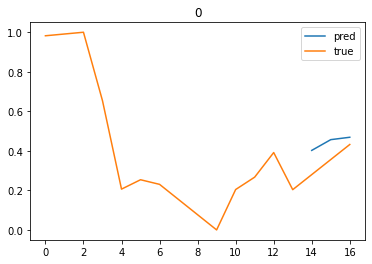

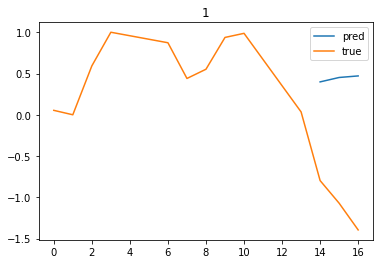

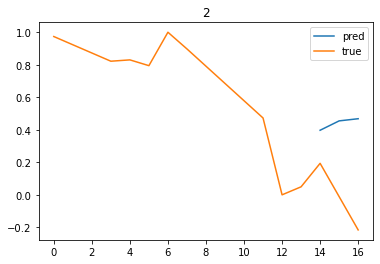

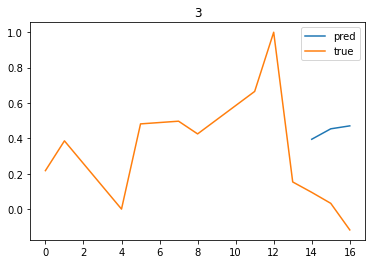

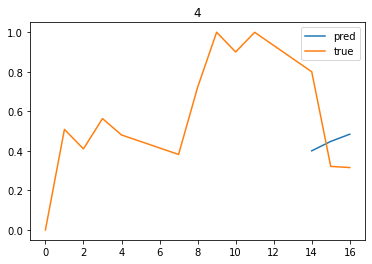

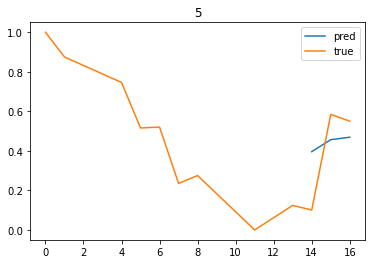

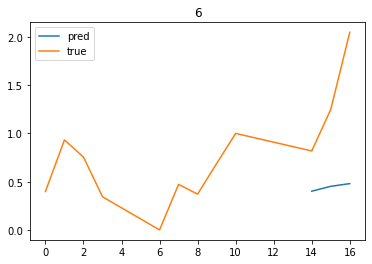

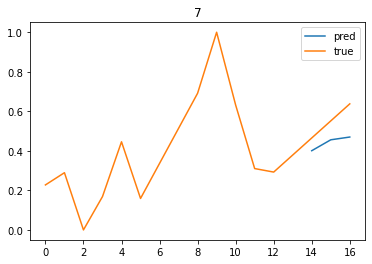

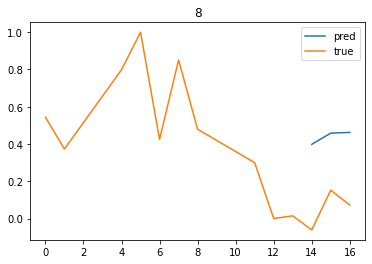

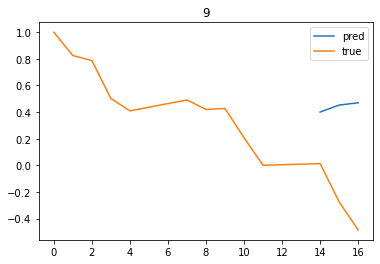

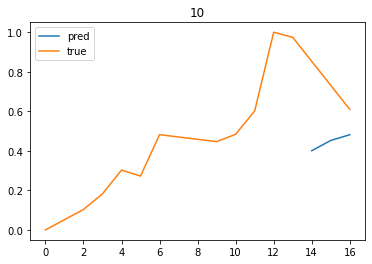

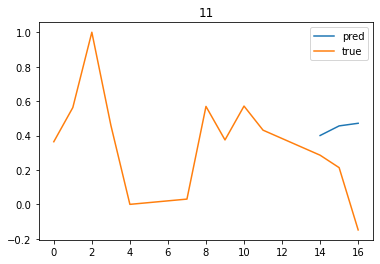

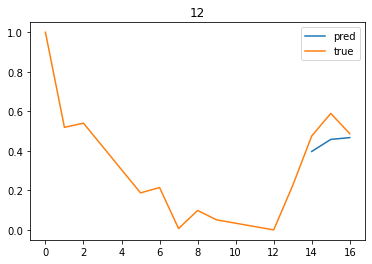

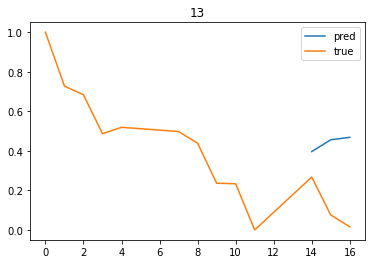

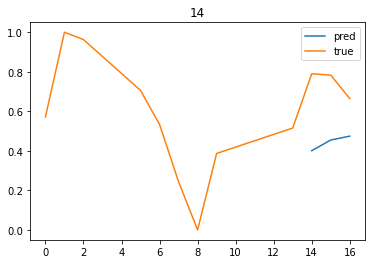

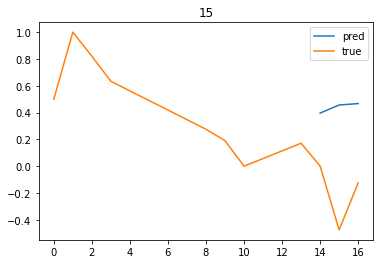

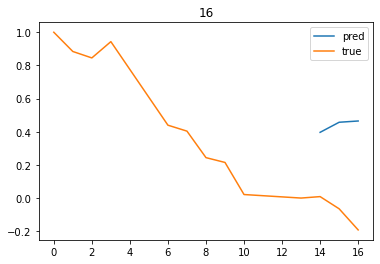

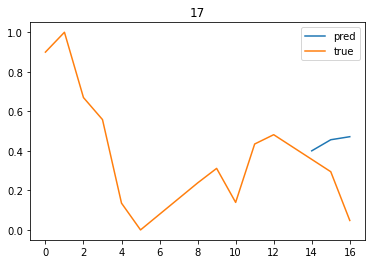

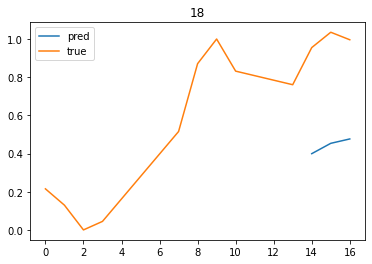

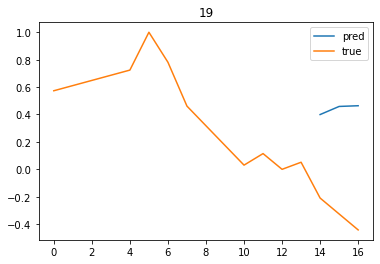

In [266]:
for i in range(20):
    _plot_x_train = X_train[i, :, 0]
    _plot_y_pred = Y_pred[i]
    _plot_y_train = Y_train[i]
    plt.plot(np.concatenate([[None]*len(_plot_x_train), _plot_y_pred]), label='pred')
    plt.plot(np.concatenate([_plot_x_train, _plot_y_train]), label='true')
    plt.title(i)
    plt.legend()
    plt.show()